In [1]:
#importing the libraries
import numpy as np
import pandas as pd

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
#reading the dataset
data=pd.read_csv('5_a.csv')

In [3]:
#printing the last few rows of the dataset
data.tail()

,y,proba
10095,1.0,0.665371
10096,1.0,0.607961
10097,1.0,0.777724
10098,1.0,0.846036
10099,1.0,0.679507


In [4]:
data['y_pred']=data['proba'].apply(lambda X: 0 if X<=0.5 else 1)

In [5]:
data.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [6]:
data

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
5,1.0,0.601600,1
6,1.0,0.666323,1
7,1.0,0.567012,1
8,1.0,0.650230,1
9,1.0,0.829346,1


In [7]:
data['y_pred'].value_counts()

1    10100
Name: y_pred, dtype: int64

In [8]:
data['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [9]:
data.describe()

,y,proba,y_pred
count,10100.000000,10100.000000,10100.0
mean,0.990099,0.697493,1.0
std,0.099015,0.114336,0.0
min,0.000000,0.500019,1.0
25%,1.000000,0.600532,1.0
50%,1.000000,0.697013,1.0
75%,1.000000,0.793915,1.0
max,1.000000,0.899965,1.0


In [10]:
#define confusion matrix
import seaborn as sns
def confusionmatrix(actual,predicted):
    bins=np.array([0,.5,1]) #define the the values b/w 0 to .5 as class 0 and .5 to 1 as class 1
    cm=np.histogram2d(actual,predicted,bins=bins)[0]
    return cm

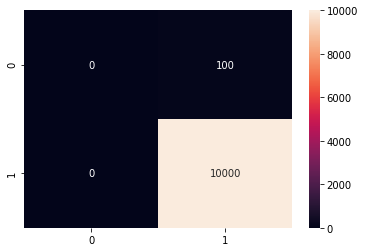

In [11]:
sns.heatmap(confusionmatrix(data['y'],data['y_pred']), annot = True,fmt='.0f')

In [12]:
cm_df=pd.DataFrame(confusionmatrix(data['y'],data['proba']))
cm_df.columns=['Predicted0','Predicted1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual1'})

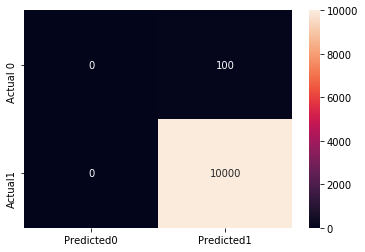

In [13]:
sns.heatmap(cm_df, annot = True,fmt='.0f')

In [14]:
c_m=confusionmatrix(data['y'],data['y_pred'])

In [15]:
def per_matrics(cm):
    TN=cm[0,0] #true negative
    FP=cm[0,1] #false negative
    TP=cm[1,1] #true positive
    FN=cm[1,0] #false positive
    N=cm[0,0]+cm[0,1] #total no of negatives
    P=cm[1,0]+cm[1,1] #total no of positives
    TNR=TN/N  #true negative rate  (specipicity)
    TPR=TP/P  #true positve rate   (sensisivity or recall ) #of all no actually belong to be positive how many model predicted positivive #or tpr=tp/(tp+fn).
    FNR=FN/P  #false negative rate
    FPR=FP/N  #fale positive rate
    accuracy=((cm[0,0]+cm[1,1])/cm.sum())
    precision=(TP/(TP+FP)) #of all no of model predicted to be positive how many are actually  positivive .
    F1_score=((2*precision*TPR)/(precision+TPR))
    return ('The accuracy is: {},True positive rate is: {}, precision is: {}, F1_score is : {}'.format((np.round(accuracy,2)),(np.round(TPR,2)),(np.round(precision,2)),(np.round(F1_score,2))))

In [16]:
per_matrics(c_m)

'The accuracy is: 0.99,True positive rate is: 1.0, precision is: 0.99, F1_score is : 1.0'

In [17]:
data=pd.read_csv('5_b.csv')

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [18]:
data.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [19]:
data['y_pred']=data['proba'].apply(lambda X: 0 if X<=0.5 else 1)

In [20]:
data.head()

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [21]:
#define confusion matrix
def confusionmatrix(actual,predicted):
    bins=np.array([0,.5,1]) #define the the values b/w 0 to .5 as class 0 and .5 to 1 as class 1
    cm=np.histogram2d(actual,predicted,bins=bins)[0]
    return cm

In [22]:
c_m=confusionmatrix(data['y'],data['y_pred'])

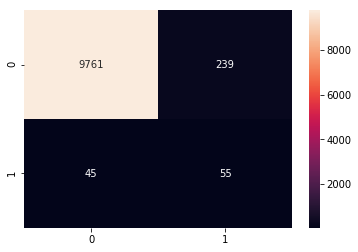

In [23]:
sns.heatmap(c_m, annot = True,fmt='.0f')

In [24]:
data['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [25]:
per_matrics(c_m)

'The accuracy is: 0.97,True positive rate is: 0.55, precision is: 0.19, F1_score is : 0.28'

In [26]:
data=pd.read_csv('5_c.csv')

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{numebr of false positives} + 100 \times \text{numebr of false negatives}$

<pre>
   <b>Note 1:</b> in this data you can see number of positive points < number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [27]:
data.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [28]:
data['y_pred']=data['prob'].apply(lambda X: 0 if X<=0.5 else 1)

In [29]:
data.head()

,y,prob,y_pred
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [30]:
data['y'].value_counts()

0    1805
1    1047
Name: y, dtype: int64

In [31]:
c_m=confusionmatrix(data['y'],data['y_pred'])

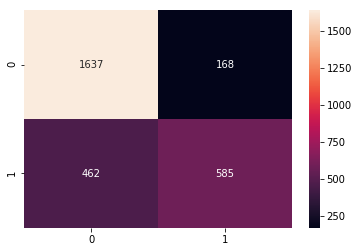

In [32]:
sns.heatmap(c_m, annot = True,fmt='.0f')

In [33]:
per_matrics(c_m)

'The accuracy is: 0.78,True positive rate is: 0.56, precision is: 0.78, F1_score is : 0.65'

In [34]:
data=pd.read_csv('5_d.csv')

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [35]:
data.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [36]:
def performance_metrics_regression(actual,predicted):
    no_of_predictors=1
    unexplained_var=sum((actual-predicted)**2)#sum of errors
    explained_var=sum((actual-np.mean(actual))**2) #sum of total 
    r_square=1-(unexplained_var/explained_var)
    M_A_D=np.median(np.abs((actual-predicted)-(np.median(actual-predicted))))#median absolute deviation
    MAD=np.mean(np.abs(actual-predicted))#mean absolute deviation
    MAPE=(np.mean(np.abs((actual-predicted)/actual)))*100 #mean absolute percentage error
    adj_r_square=1-((unexplained_var/actual.size)/(explained_var/actual.size))
    adj_r_square_1=(1-(1-r_square))*((actual.size-1)/(actual.size-no_of_predictors-1))
    RMSE=np.sqrt(np.mean((actual-predicted)**2)) #root mean square
    return ("M_A_D is:{} ,MAD is:{},MAPE is:{},rmse is:{}, r_square is:{}, adj_r_squre{}".format(np.round(M_A_D,4),np.round(MAD,4),np.round(MAPE,4),np.round(RMSE,4),np.round(r_square,4),np.round(adj_r_square_1,4)))

In [37]:
performance_metrics_regression(data['y'],data['pred'])  

'M_A_D is:5.0 ,MAD is:8.5945,MAPE is:inf,rmse is:13.3104, r_square is:0.9564, adj_r_squre0.9564'